<a href="https://colab.research.google.com/github/lawrence773/us-tornadoes/blob/main/US_Tornadoes_1950_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://s.yimg.com/ny/api/res/1.2/UUaNz9bFk2SPPFyUlcB1Tg--/YXBwaWQ9aGlnaGxhbmRlcjt3PTIwNDg7aD0xMTUyO2NmPXdlYnA-/https://media.zenfs.com/en/comingsoon_net_477/0957d1904de477e1ded0b68ce683f806' width='700'>

# Introduction
I have donwloaded this dataset from [kaggle](https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021?resource=download) out of personal interest, to better understand tornado "behaviour" and occurrences in the US. The attached description gives the following information on the columns:
*   yr - 4-digit year
*   mn - Month (1-12)
*   dy - Day of month
*   date - Datetime object (e.g. 1950-01-01)
*   st - State where tornado originated; 2-digit abbreviation
*   mag - F rating thru Jan 2007; EF rating after Jan 2007 (-9 if unknown rating)
*   inj - Number of injuries
*   fat - Number of fatalities
*   slat - Starting latitude in decimal degrees
*   slon - Starting longitude in decimal degrees
*   elat - Ending latitude in decimal degrees (value of 0 if missing)
*   elon - Ending longitude in decimal degrees (value of 0 if missing)
*   len - Length of track in miles
*   wid - Width in yards

The description also states the following:

> "*This dataset was derived from a dataset produced by NOAA's Storm Prediction Center. The primary changes made to create this dataset were the deletion of some columns, change of some data types, and sorting by date*."

In the following, I am going to examine and analyze the dataset, and then visualize my findings. In the case of the GeoPandas and Contextily plots, I have incorporated elements of an [article](https://medium.com/@jl_ruiz/plot-maps-from-the-us-census-bureau-using-geopandas-and-contextily-in-python-df787647ef77#:~:text=Download%20shapefiles%20(*.,shapes%20with%20raster%20tile%20plots.) by Jose Luis Ruiz on Medium.



















## Data Cleaning & Exploration

In [1]:
# Install necessary packages
%pip install adjustText
%pip install contextily

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import re

# Data visualization
import matplotlib.pyplot as plt
from adjustText import adjust_text
from importlib import reload
import seaborn as sns
import geopandas as gpd
import contextily as ctx

In [3]:
# Set the format to display floating point numbers with two decimals
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Import the .csv file
tornado_df = pd.read_csv('/content/us_tornado_dataset_1950_2021.csv', encoding='unicode_escape')

In [5]:
# Take a look at the data
tornado_df.head()

yr  mo  dy        date  st  mag  inj  fat  slat   slon  elat   elon  len  \
0  1950   1   3  1950-01-03  IL    3    3    0 39.10 -89.30 39.12 -89.23 3.60   
1  1950   1   3  1950-01-03  MO    3    3    0 38.77 -90.22 38.83 -90.03 9.50   
2  1950   1   3  1950-01-03  OH    1    1    0 40.88 -84.58  0.00   0.00 0.10   
3  1950   1  13  1950-01-13  AR    3    1    1 34.40 -94.37  0.00   0.00 0.60   
4  1950   1  25  1950-01-25  IL    2    0    0 41.17 -87.33  0.00   0.00 0.10   

   wid  
0  130  
1  150  
2   10  
3   17  
4  100

Although short column names are convenient, thse are perhaps too short to easily interpret, so I'll rename some of them.

In [6]:
# Rename columns for clarity
tornado_df.rename(columns={'yr': 'year',
                           'mo': 'month',
                           'dy': 'day',
                           'st': 'state',
                           'mag': 'magnitude',
                           'inj': 'injuries',
                           'fat': 'fatalities',
                           'slat': 'start_lat',
                           'slon': 'start_long',
                           'elat': 'end_lat',
                           'elon': 'end_long',
                           'len': 'track_length_miles',
                           'wid': 'track_width_yards'}, inplace=True)

While we are here, let's add some extra columns for those of us who are used to the metric system.

In [7]:
# Add extra columns
tornado_df['track_length_km'] = tornado_df['track_length_miles'] * 1.60934
tornado_df['track_width_meters'] = tornado_df['track_width_yards'] * 0.9144

In [8]:
# Check the shape of the dataframe
print(f'The shape of the dataset is {tornado_df.shape[0]} rows and {tornado_df.shape[1]} columns.')

The shape of the dataset is 67558 rows and 16 columns.


Over 67,500 rows - that's a lot of tornadoes!

In [9]:
# Check the column datatypes
tornado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67558 entries, 0 to 67557
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                67558 non-null  int64  
 1   month               67558 non-null  int64  
 2   day                 67558 non-null  int64  
 3   date                67558 non-null  object 
 4   state               67558 non-null  object 
 5   magnitude           67558 non-null  int64  
 6   injuries            67558 non-null  int64  
 7   fatalities          67558 non-null  int64  
 8   start_lat           67558 non-null  float64
 9   start_long          67558 non-null  float64
 10  end_lat             67558 non-null  float64
 11  end_long            67558 non-null  float64
 12  track_length_miles  67558 non-null  float64
 13  track_width_yards   67558 non-null  int64  
 14  track_length_km     67558 non-null  float64
 15  track_width_meters  67558 non-null  float64
dtypes: f

So far so good: all columns seem to have the appropriate data type.

In [10]:
# Quick check for NaN values
tornado_df.isna().sum()

year                  0
month                 0
day                   0
date                  0
state                 0
magnitude             0
injuries              0
fatalities            0
start_lat             0
start_long            0
end_lat               0
end_long              0
track_length_miles    0
track_width_yards     0
track_length_km       0
track_width_meters    0
dtype: int64

No NaN values means no need for row dropping or data imputations. Let's see some quick summaries.

In [11]:
# Quick summary of the numerical data
tornado_df.describe()

year     month       day  magnitude  injuries  fatalities  \
count 67,558.00 67,558.00 67,558.00  67,558.00 67,558.00   67,558.00   
mean   1,991.34      5.98     15.92       0.69      1.44        0.09   
std       19.33      2.44      8.74       1.28     18.26        1.48   
min    1,950.00      1.00      1.00      -9.00      0.00        0.00   
25%    1,976.00      4.00      8.00       0.00      0.00        0.00   
50%    1,994.00      6.00     16.00       1.00      0.00        0.00   
75%    2,008.00      7.00     24.00       1.00      0.00        0.00   
max    2,021.00     12.00     31.00       5.00  1,740.00      158.00   

       start_lat  start_long   end_lat  end_long  track_length_miles  \
count  67,558.00   67,558.00 67,558.00 67,558.00           67,558.00   
mean       37.14      -92.78     22.73    -56.25                3.48   
std         5.09        8.69     18.59     45.49                8.28   
min        17.72     -163.53      0.00   -163.53                0.00   
25%        33.22      -98.45      0.00    -94.71                0.10   
50%        37.03      -93.60     32.48    -84.42                0.80   
75%        40.93      -86.73     38.61      0.00                3.13   
max        61.02      -64.72     61.02      0.00              234.70   

       track_width_yards  track_length_km  track_width_meters  
count          67,558.00        67,558.00           67,558.00  
mean              106.58             5.60               97.45  
std               205.80            13.32              188.19  
min                 0.00             0.00                0.00  
25%                20.00             0.16               18.29  
50%                50.00             1.29               45.72  
75%               100.00             5.04               91.44  
max             4,576.00           377.71            4,184.29

There are several interesting number that worth mentioning. For example, we can see that the while the maximum number of fatalities is 158, the average is relatively low, 0.09/tornado. The same goes for the number of injuries. This is likely due to the early warning systems and quick response of rescue teams. Another thing we can note here is that the average tornado track was around 5.60 km, whereas the longest one was over 377 km! The average width - which, according to the [National Weather Service](https://www.weather.gov/lmk/tornadoesfaq#:~:text=However%2C%20the%20term%20%22average%22,is%20a%20multiple%2Dvortex%20tornado?) can change multiple times during the life of a tornado - was around 100 m, which would be enough in itself, but the largest recorded width was over 4 km wide, which must have been an absolute beast!

In [12]:
# Check the non-numerical data
tornado_df.describe(include='object')

date  state
count        67558  67558
unique       12300     53
top     2011-04-27     TX
freq           207   9149

It is interesting to see that for 67,500 tornadoes we only have 12,300 unique dates, which means that on a given date, multiple tornadoes were active. On average this would be around 5.5 tornadoes every day, but we see that April 27th 2011 appears 207 times. This is not an error: April 2011 was the most active tornado month in US history and, according to [Wikipedia](https://https://en.wikipedia.org/wiki/List_of_United_States_tornadoes_in_April_2011#:~:text=Over%20215%20tornadoes%20occurred%20on%20April%2027%20alone.), over 215 tornadoes were recorded on the 27th. That must have been a difficult day. The state of Texas is also the most frequently appearing state in the dataset where they recorded over 9,000 tornadoes between 1950 and 2021.

## Data Analysis & Visualization

### 1. Tornadoes by Year
Let's start by examining some trends over time.

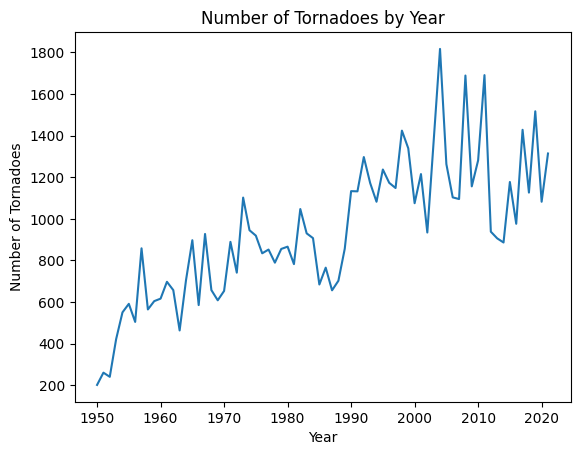

(72,)


In [13]:
# Group by 'year' and count the values in the 'date' column
yearly_tornadoes = tornado_df.groupby('year')['date'].count()

# Do a simple line plot
sns.lineplot(data=yearly_tornadoes)
sns.set_style('darkgrid')

plt.title('Number of Tornadoes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.show()

print(yearly_tornadoes.shape)

The overall trend seems to be an increasing one. Let's see if the distructive power of the tornadoes is also increasing.

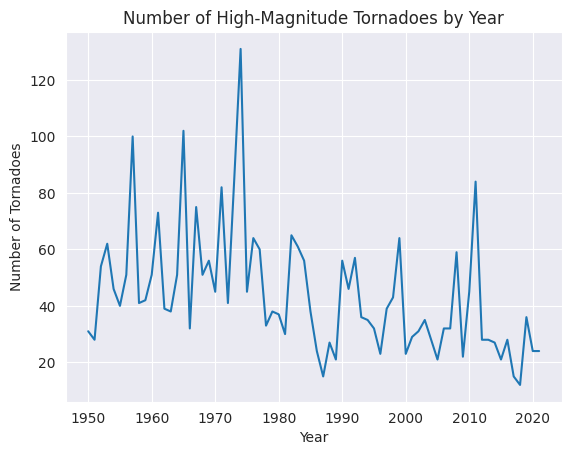

In [14]:
# Get a subset for high-magnitude tornadoes
high_mag_tornadoes = tornado_df[tornado_df['magnitude'] >= 3]

# Group by year and count the values in the date column again
yearly_high_mag_tornadoes = high_mag_tornadoes.groupby('year')['date'].count()

# Plot a lineplot
sns.lineplot(data=yearly_high_mag_tornadoes)
sns.set_style('darkgrid')

plt.title('Number of High-Magnitude Tornadoes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.show()

Interestingly, this trend seems to be the opposite of what we have seen above, as there is a decreasing tendency in the number of high-magnitude tornadoes, even though overall tornado numbers are increasing. Now, let's see if there are seasonal differences within a certain year.

### 2. Tornadoes by Month

In [15]:
# Count the monthly occurrences for each year
monthly_tornadoes = tornado_df.groupby('year').agg({'month': 'value_counts'}).rename(columns={'month': 'count'})

# Create a pivot table with the resulting dataframe
pivot_table = monthly_tornadoes.reset_index().pivot_table(index='year', columns='month', values='count', fill_value=0)

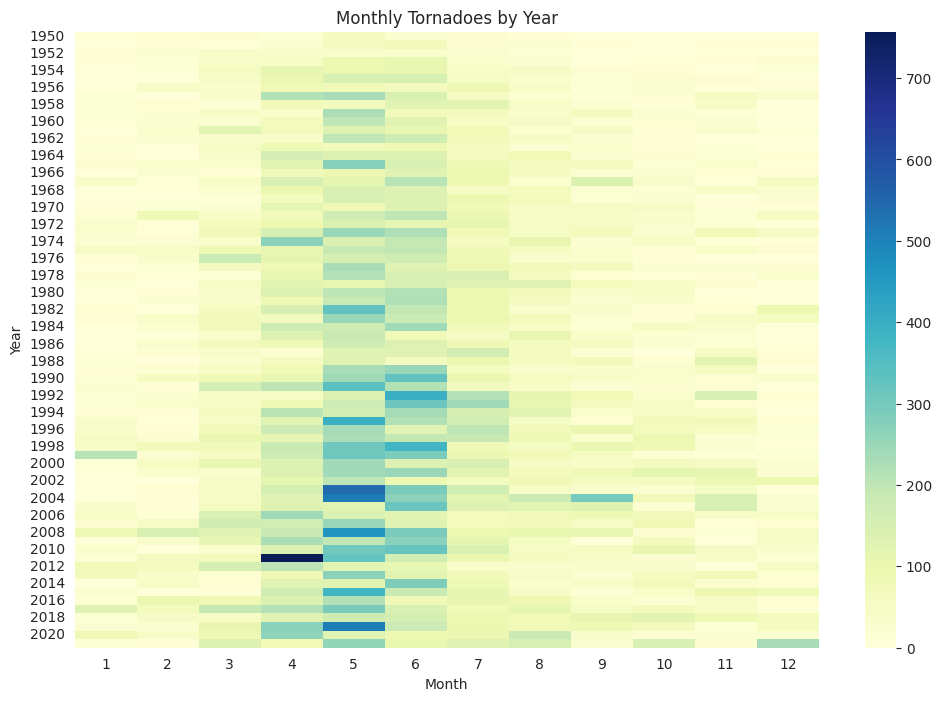

In [16]:
# Visualize our data on a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=pivot_table, cmap='YlGnBu', annot=False)
plt.title('Monthly Tornadoes by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

According to our heatmap, the number of tornadoes usually starts to increase in March, then reaches its peak in May, after which the number gradually decreases to a 'normal' level by August. The darkest cell on our heatmap is the infamous month of April 2011 discussed above. The tornado season can thus be placed between March and August.

### 3. Distribution of Categories
Now, let's examine the distribution of tornado sizes in a histogram.

           count
magnitude       
0          31375
1          22885
2           9517
3           2536
4            581
5             59


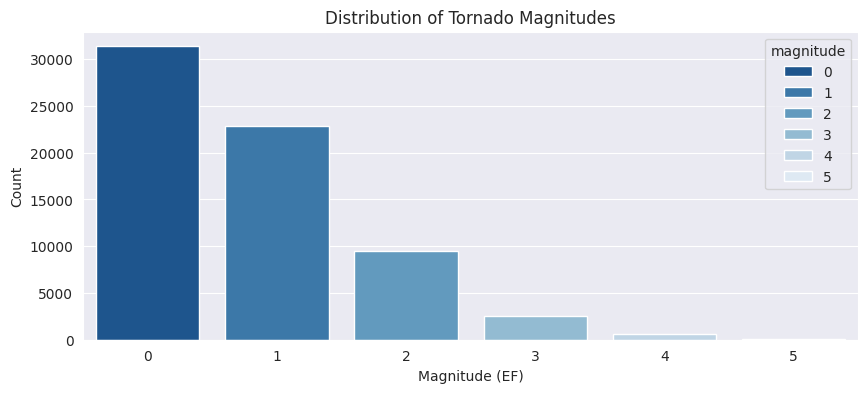

In [17]:
# Count the number of different magnitude categories
magnitudes_df = tornado_df['magnitude'].value_counts().reset_index().set_index('magnitude')

# Drop the rows where the magnitude is unknown (-9)
magnitudes_df = magnitudes_df.drop(-9)
print(magnitudes_df)

# Set the colors of the bar chart using 'Blues_r' for reversed color order (i.e. from dark to light)
colors = sns.color_palette("Blues_r", n_colors=len(magnitudes_df))

# Plot a bar chart with Seaborn
plt.figure(figsize=(10, 4))

sns.barplot(data=magnitudes_df, x='magnitude', y='count', hue='magnitude', palette=colors)
plt.title('Distribution of Tornado Magnitudes')
plt.xlabel('Magnitude (EF)')
plt.ylabel('Count')
plt.show()

It seems that smaller tornadoes with less damage are more frequent, and really destructive tornadoes (cat. 4-5) are relatively rare. The original scale of Dr Theodore Fujita (proposed in 1971) defined these categories as follows:

*   F0 (Gale)
*   F1 (Weak)
*   F2 (Strong)
*   F3 (Severe)
*   F4 (Devastating)
*   F5 (Incredible)

This scale was then further [enhanced](https://www.spc.noaa.gov/efscale/#:~:text=Dr.,the%20United%20States%20since%201950.) in later decades. Let's see if there were any changes in the ditribution of magnitudes throughout the years.






In [18]:
# Group by 'year' and count the number of each magnitude
magnitude_distr = tornado_df.groupby('year').agg({'magnitude': 'value_counts'}).rename(columns={'magnitude': 'count'})

# Create a pivot table using the above
mag_dist_pivot = magnitude_distr.reset_index().pivot_table(index='year', columns='magnitude', values='count', fill_value=0)

# Drop the column with unknown values (-9)
mag_dist_pivot.drop(-9, axis=1, inplace=True)

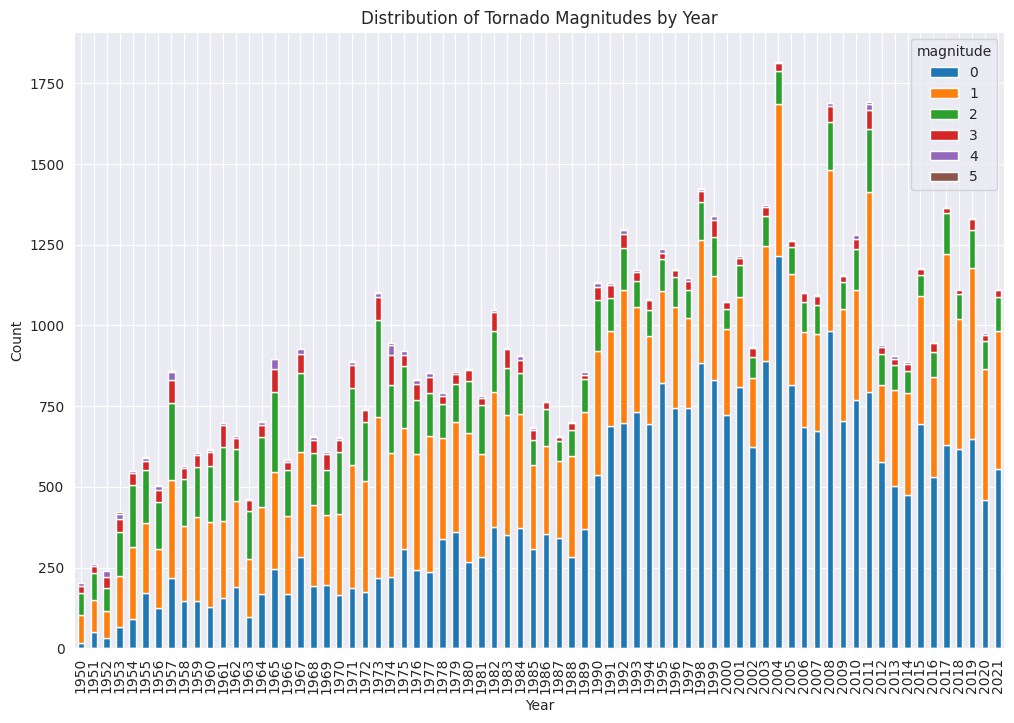

In [19]:
# Plot the data in a stacked bar chart
mag_dist_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Tornado Magnitudes by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Again, our data suggests that while the number of stronger tornadoes (cat. 3-5) seems to have decreased, the number of the weakest tornadoes (cat. 0) roughly doubled starting from the '90s; there was no significant change in the number of cat. 1 tornadoes. This sudden change might be related to Dr Fujita's updating his original scale in his memoirs entitled *Mystery of Severe Storms*, which were published in 1992, although the number of small tornadoes already started growing in 1990.

### 4. Magnitude Impact Analysis
In this section, we will check if there is a correlation between the magnitude of a tornado and the number of injuries and fatalities.

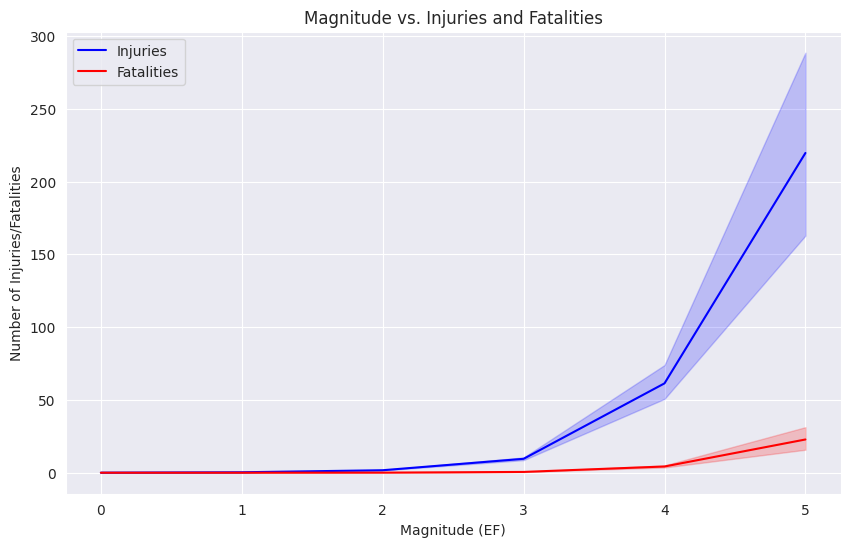

In [20]:
# Create a subset where we don't look at tornadoes with unknown magnitudes
tornado_df_mag = tornado_df[tornado_df['magnitude'] != -9]

# Plot a scatterplot to see the relationship between magnitude and fatalities
plt.figure(figsize=(10, 6))
sns.lineplot(data=tornado_df_mag, x='magnitude', y='injuries', color='blue', label='Injuries')
sns.lineplot(data=tornado_df_mag, x='magnitude', y='fatalities', color='red', label='Fatalities')
plt.title('Magnitude vs. Injuries and Fatalities')
plt.xlabel('Magnitude (EF)')
plt.ylabel('Number of Injuries/Fatalities')
plt.legend(loc='upper left')
plt.show()

As we have expected, there is a positive correlation between the number of injuries and fatalities and the category of a tornado: the higher the magnitude, the higher the number of casualties. It is noteworthy that significant numbers only appear at magnitudes 3 and above.

### 5. Track Length Impact
Now, let's look at injuries from the aspect of the tornadoes' track length.

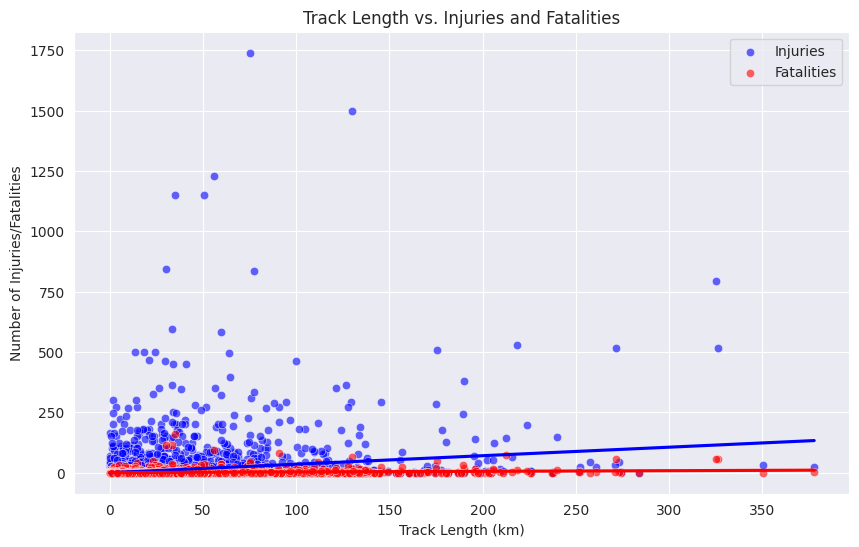

In [21]:
# Plot scatterplot to see the correlation between track length and number of injuries/fatalities
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tornado_df_mag, x='track_length_km', y='injuries', color='blue', label='Injuries', alpha=0.6)
sns.scatterplot(data=tornado_df_mag, x='track_length_km', y='fatalities', color='red', label='Fatalities', alpha=0.6)

sns.regplot(x="track_length_km", y="injuries", data=tornado_df_mag, scatter=False, color='blue', ci=False)
sns.regplot(x="track_length_km", y="fatalities", data=tornado_df_mag, scatter=False, color='red', ci=False)

plt.title('Track Length vs. Injuries and Fatalities')
plt.xlabel('Track Length (km)')
plt.ylabel('Number of Injuries/Fatalities')
plt.legend(loc='upper right')
plt.show()

Interestingly, based on the dots, it would seem that most injuries and fatalities occur during tornadoes with shorter tracks. But this might just mean that the number of tornadoes with a shorter lifespan is higher. The regression lines tell us that there is a slight positive correlation between track length and injuries, whereas the slope of track length vs. fatalities is almost zero, indicating a very weak relationship. Let's take a look at the relationship between the magnitude of a tornado and its track length.

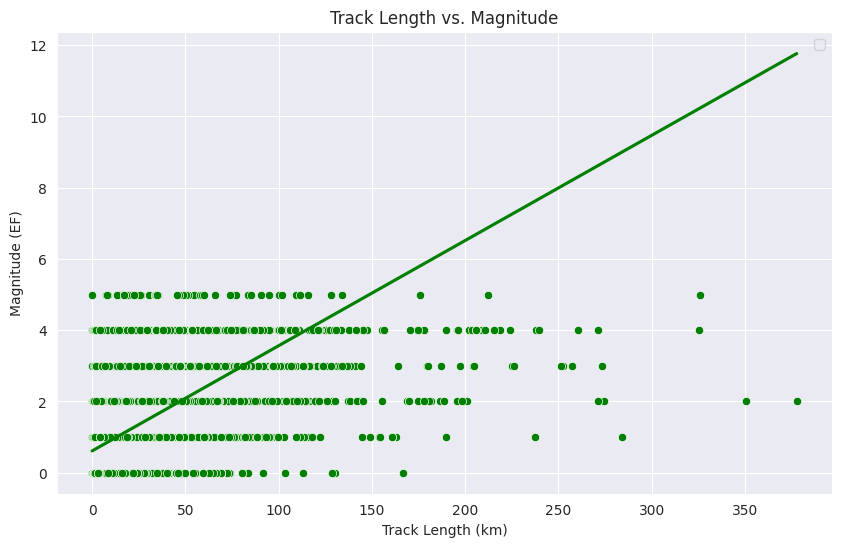

In [22]:
# Plot lineplot to see the relationship between track length and magnitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tornado_df_mag, x='track_length_km', y='magnitude', color='green')

sns.regplot(x="track_length_km", y="magnitude", data=tornado_df_mag, scatter=False, color='green', ci=False)
plt.title('Track Length vs. Magnitude')
plt.xlabel('Track Length (km)')
plt.ylabel('Magnitude (EF)')
plt.legend(loc='upper right')
plt.show()

It looks as though there was a slight positive correlation between track length and magnitude, especially given the fact that higher-magnitude tornadoes are rarer. Finally, let's check the correlation between track width and track length.

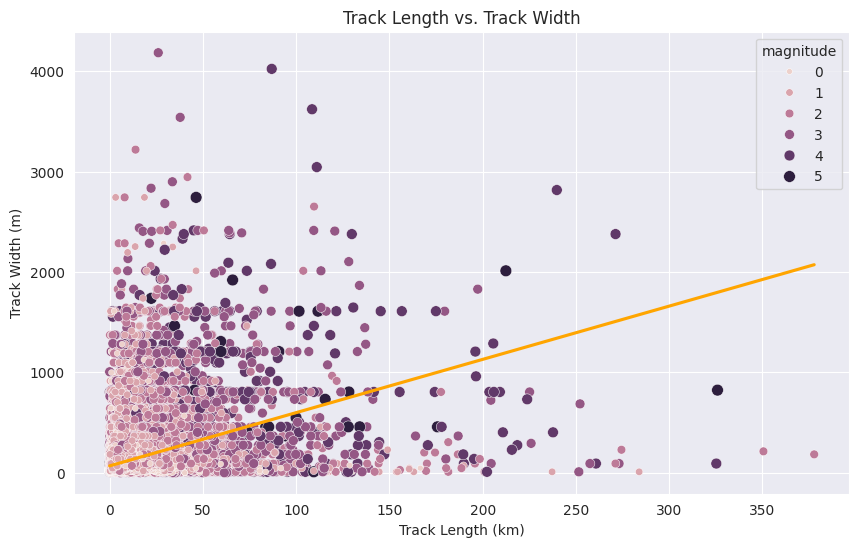

In [23]:
# Plot a scatterplot for track width and track length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tornado_df_mag, x='track_length_km', y='track_width_meters', hue='magnitude', size='magnitude')

sns.regplot(x="track_length_km", y="track_width_meters", data=tornado_df_mag, scatter=False, color='orange', ci=False)
plt.title('Track Length vs. Track Width')
plt.xlabel('Track Length (km)')
plt.ylabel('Track Width (m)')
plt.show()

The width and track length of a tornado also seems to be posivitely correlated. All in all, the more powerful a tornado is, the wider it can be, and the longer it can be active.

There are two more things we can check here. The correlation between the time of the year and the track length and magnitude of a tornado, respectively.

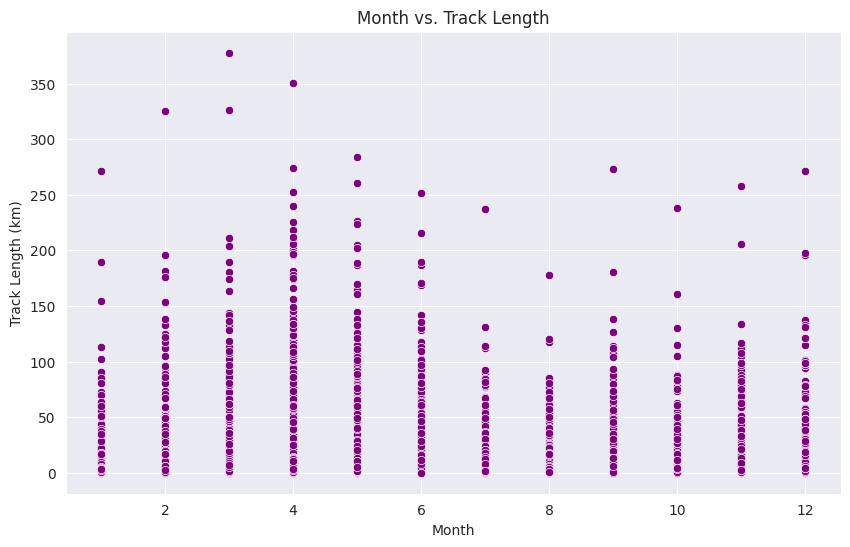

In [24]:
# Plot a scatterplot to see the correlation between the time of year and the track length of a tornado
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tornado_df, x='month', y='track_length_km', color='purple')

plt.title('Month vs. Track Length')
plt.xlabel('Month')
plt.ylabel('Track Length (km)')
plt.show()

According to this chart, we can expect longer tracks during the months of the tornado season. Let's check the distribution of magnitudes.

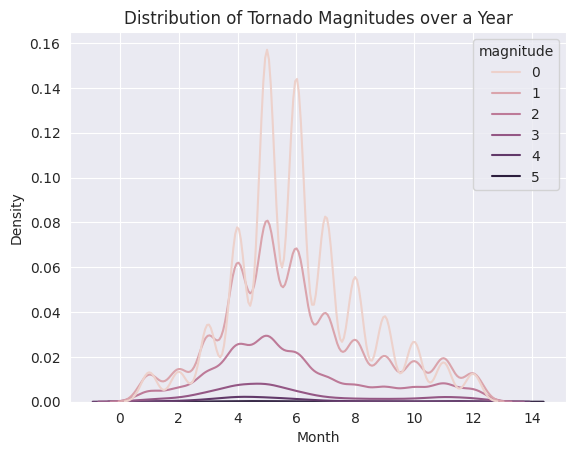

In [25]:
# Plot a KDE plot to see the distribution of tornado magnitudes over a year
sns.kdeplot(data=tornado_df_mag, x="month", hue="magnitude")
plt.title('Distribution of Tornado Magnitudes over a Year')
plt.xlabel('Month')
plt.ylabel('Density')
plt.show()

This chart seems to correlate with the heatmap created above. The higher density is likely due to the fact that there are simply more tornadoes during tornado season than outside of it, so the chance of higher magnitude tornadoes are also related to the number of tornadoes occurring besides favourable meteorological conditions.

### 6. Geographical Analysis

For the sake of simplicity and better visualization, I will omit non-continental states and Alaska from the below analysis.

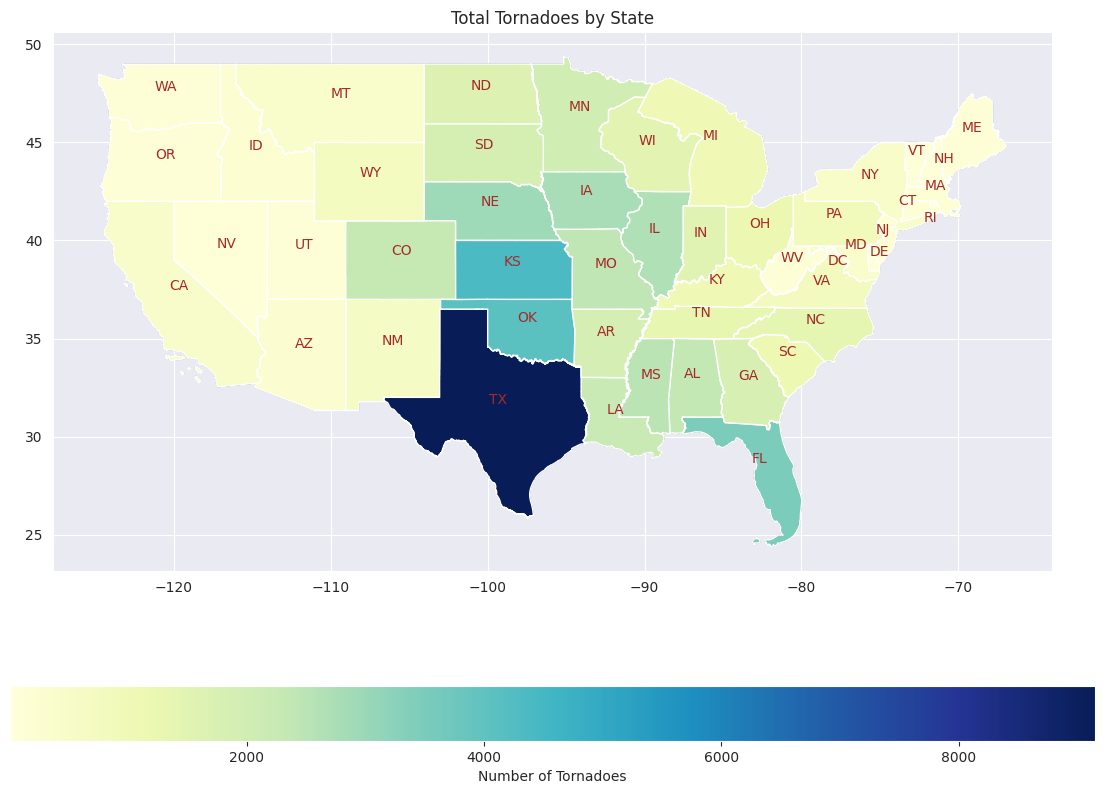

In [26]:
# Calculate the occurrence of each state
state_counts = tornado_df['state'].value_counts()

# Import the .shp file for the US map
us_df = gpd.read_file('/content/map/tl_2023_us_state.shp')

# Set the geographic coordinate system
us_df = us_df.to_crs("EPSG:4326")

# Set the index for geopandas 'STUSPS' and merge the map with our data
us_df = us_df.set_index('STUSPS').join(state_counts)

# Select and remove the non-continental states + Alaska
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us_49 = us_df
for n in non_continental:
    us_49 = us_49[us_49.index != n]

# Plot a choropleth map
fig, ax = plt.subplots(figsize=(14, 10))
us_49.plot(ax=ax, color='lightblue', edgecolor="black", linewidth=0.5)
us_49.plot(column='count', cmap='YlGnBu', legend=True,
           legend_kwds={'label': "Number of Tornadoes",
                        'orientation': "horizontal"}, ax=ax)

texts = []

# Put the state names on the map
for index, row in us_49.reset_index().iterrows():
    text = plt.annotate(text=row['STUSPS'],
                        xy=row['geometry'].centroid.coords[0],
                        ha='center',
                        color='brown',
                        fontsize=10)
    texts.append(text)

# Use adjustText on the text positions to avoid overlap
adjust_text(texts)

plt.title('Total Tornadoes by State')
plt.show()


That vertical band of darker green states in the middle is known as ["Tornado Alley"](https://en.wikipedia.org/wiki/Tornado_Alley), which reaches parts of Canada, and it is a region where tornadoes most frequently occur. We can see that Texas has been hit by over 9,000 tornadoes during the examined period, over twice as many as Kansas or Oklahoma with between 4-4,500 tornadoes, or Nebraska with almost 3,000 tornadoes in total. Although Florida is not in the "alley", it was hit by nearly 3,500 tornadoes in 70 years. Let's see the same data in a bar chart too.

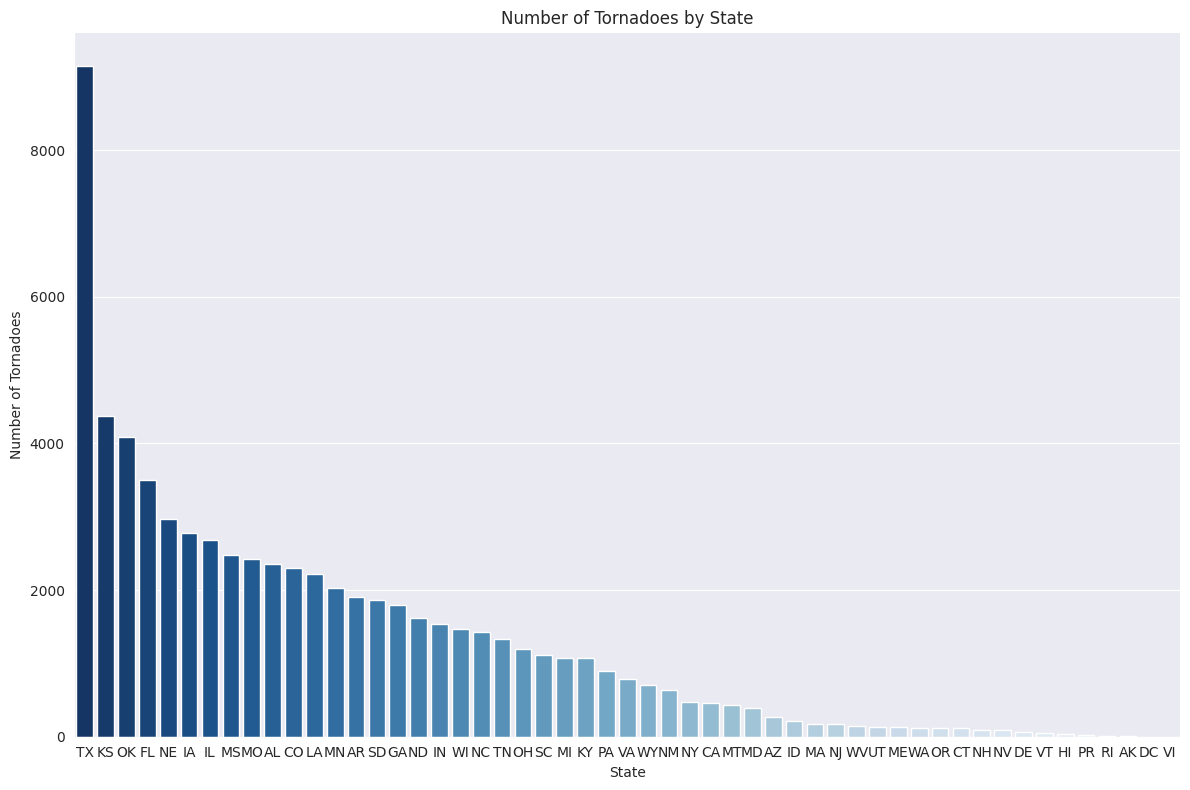

In [27]:
# Transform our Series into a DataFrame
state_counts_df = state_counts.reset_index()

# Define the colors and the fig size
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Blues_r", n_colors=len(state_counts_df))
sns.set_style('darkgrid')

# Plot the bar chart
sns.barplot(data=state_counts_df, x=state_counts_df['state'], y=state_counts_df['count'], palette=colors, hue=state_counts_df['state'], legend=False)
plt.title('Number of Tornadoes by State')
plt.xlabel('State')
plt.ylabel('Number of Tornadoes')
plt.tight_layout()
plt.show()

In [28]:
# Double check top and bottom tornado numbers
print(state_counts_df.head())
print(state_counts_df.tail())

  state  count
0    TX   9149
1    KS   4375
2    OK   4092
3    FL   3497
4    NE   2967
   state  count
48    PR     28
49    RI     13
50    AK      4
51    DC      3
52    VI      1


Among the states that had the smallest number of tornadoes, we see Alaska, surprisingly, with 4 recorded tornadoes, and the Virgin Islands, with a single recorded tornado at the bottom of the list.

### 7. Track Directions
Let's take a look at the direction of the longest tornadoes in Texas. I have chosen the longest ones so that the plot would offer us insight into tornado movements. For this, we are going to use a Python library called Contextily along with GeoPandas.

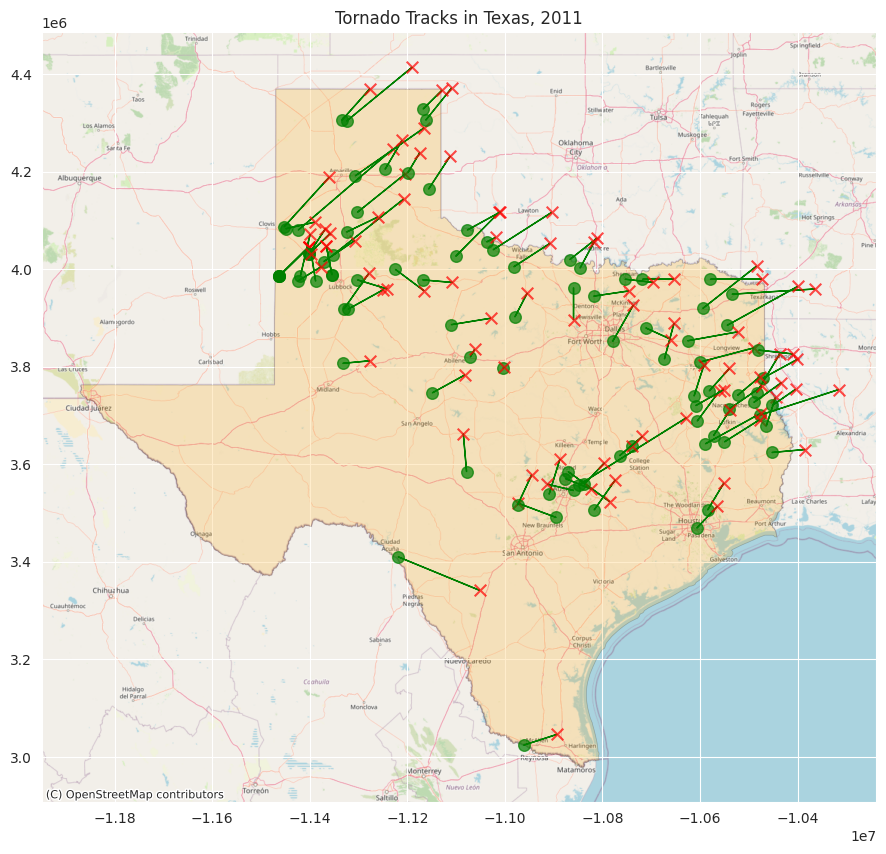

In [29]:
# Create a subset containing all tornadoes from Texas
texas_tornadoes = tornado_df[(tornado_df['state'] == 'TX')]

# Sort values based on track length
tex_longest_tracks = texas_tornadoes.sort_values(by='track_length_km', ascending=False).head(90)

# Use the earlier GeoPandas dataframe to filter for Texas
texas_df = us_49[us_49.index == 'TX']

# Reproject the map to web-mercator for compatibility with contextily
texas_df = texas_df.to_crs(epsg=3857)

# Plot Texas
fig, ax = plt.subplots(figsize=(14, 10))
texas_df.plot(ax=ax, color='orange', edgecolor="black", linewidth=0.5, alpha=0.2)

# Loop through the df to get the starting and ending lat and long values
for index, row in tex_longest_tracks.iterrows():
    start_lat = row['start_lat']
    start_long = row['start_long']
    end_lat = row['end_lat']
    end_long = row['end_long']

    # Convert these values to web-mercator for contextily
    start_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([start_long], [start_lat]), crs=4326)
    start_point = start_point.to_crs(epsg=3857)
    end_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([end_long], [end_lat]), crs=4326)
    end_point = end_point.to_crs(epsg=3857)

    # Plot the starting point as a green dot
    ax.scatter(start_point.geometry.x, start_point.geometry.y, color='green', marker='o', s=70, alpha=0.7)

    # Plot the approximate trajectory and endpoint as an arrow
    ax.add_patch(plt.Arrow(start_point.geometry.x.iloc[0], start_point.geometry.y.iloc[0],
                           end_point.geometry.x.iloc[0] - start_point.geometry.x.iloc[0],
                           end_point.geometry.y.iloc[0] - start_point.geometry.y.iloc[0],
                           color='green', width=1000))

    # Plot the endpoint as a red 'x'
    ax.scatter(end_point.geometry.x, end_point.geometry.y, color='red', marker='x', s=70, alpha=0.7)

# Add basemap with using OpenStreetMap
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=7)

plt.title('Tornado Tracks in Texas, 2011')
plt.show()

I have taken 90 tornadoes with the longest tracks in Texas (roughly 10% of all tornadoes in Texas) and plotted them on the map with green dots marking their starting point and red 'x's marking the end points. The green line between each dot-x pair is the approximate trajectory. It seems that a great majority of tornadoes formed in Texas that lasted long enough to have a trajectory, moved in a SW-NE direction, which is likely to be expected in the case of future tornadoes too. Let's repeat this test on two other states, one inland, and one that is surrounded by water.

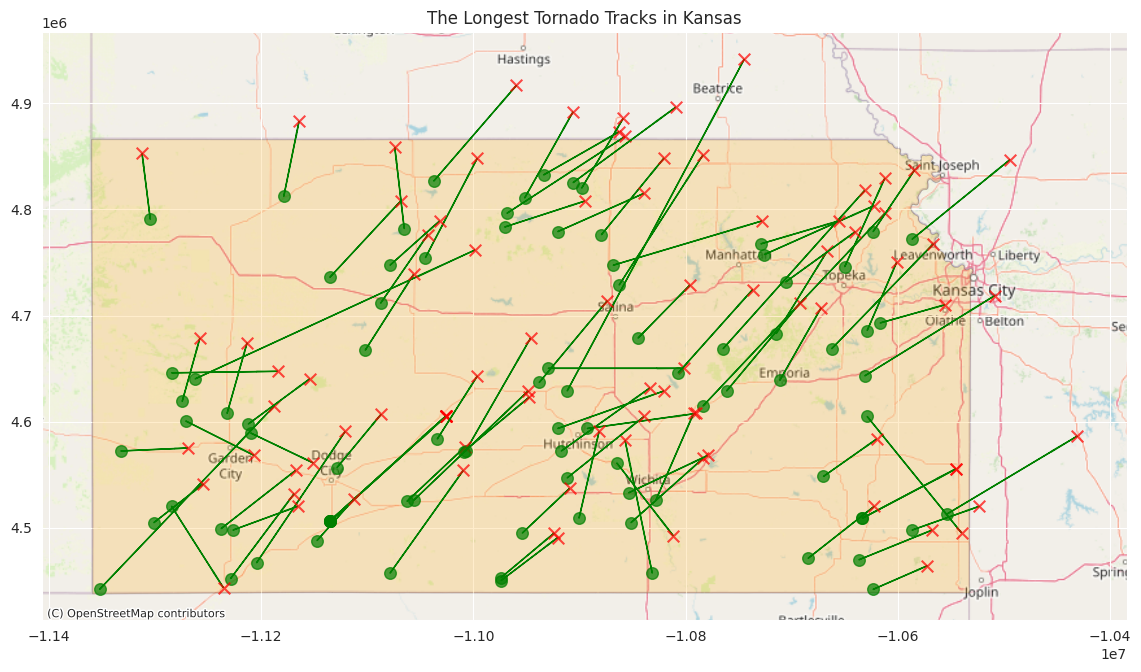

In [30]:
# Create a subset containing all tornadoes from Kansas
kansas_tornadoes = tornado_df[(tornado_df['state'] == 'KS')]

# Sort values based on track length
kan_longest_tracks = kansas_tornadoes.sort_values(by='track_length_km', ascending=False).head(90)

# Use the earlier GeoPandas dataframe to filter for Kansas
kansas_df = us_49[us_49.index == 'KS']

# Reproject the map to web-mercator for compatibility with contextily
kansas_df = kansas_df.to_crs(epsg=3857)

# Plot Kansas
fig, ax = plt.subplots(figsize=(14, 10))
kansas_df.plot(ax=ax, color='orange', edgecolor="black", linewidth=0.5, alpha=0.2)

# Loop through the df to get the starting and ending lat and long values
for index, row in kan_longest_tracks.iterrows():
    start_lat = row['start_lat']
    start_long = row['start_long']
    end_lat = row['end_lat']
    end_long = row['end_long']

    # Convert these values to web-mercator for contextily
    start_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([start_long], [start_lat]), crs=4326)
    start_point = start_point.to_crs(epsg=3857)
    end_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([end_long], [end_lat]), crs=4326)
    end_point = end_point.to_crs(epsg=3857)

    # Plot the starting point as a green dot
    ax.scatter(start_point.geometry.x, start_point.geometry.y, color='green', marker='o', s=70, alpha=0.7)

    # Plot the approximate trajectory and endpoint as an arrow
    ax.add_patch(plt.Arrow(start_point.geometry.x.iloc[0], start_point.geometry.y.iloc[0],
                           end_point.geometry.x.iloc[0] - start_point.geometry.x.iloc[0],
                           end_point.geometry.y.iloc[0] - start_point.geometry.y.iloc[0],
                           color='green', width=1000))

    # Plot the endpoint as a red 'x'
    ax.scatter(end_point.geometry.x, end_point.geometry.y, color='red', marker='x', s=70, alpha=0.7)

# Add basemap with using OpenStreetMap
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=7)

plt.title('The Longest Tornado Tracks in Kansas')
plt.show()

In the case of Kansas tornadoes, the tendency seems to be the same as above. What about Florida?

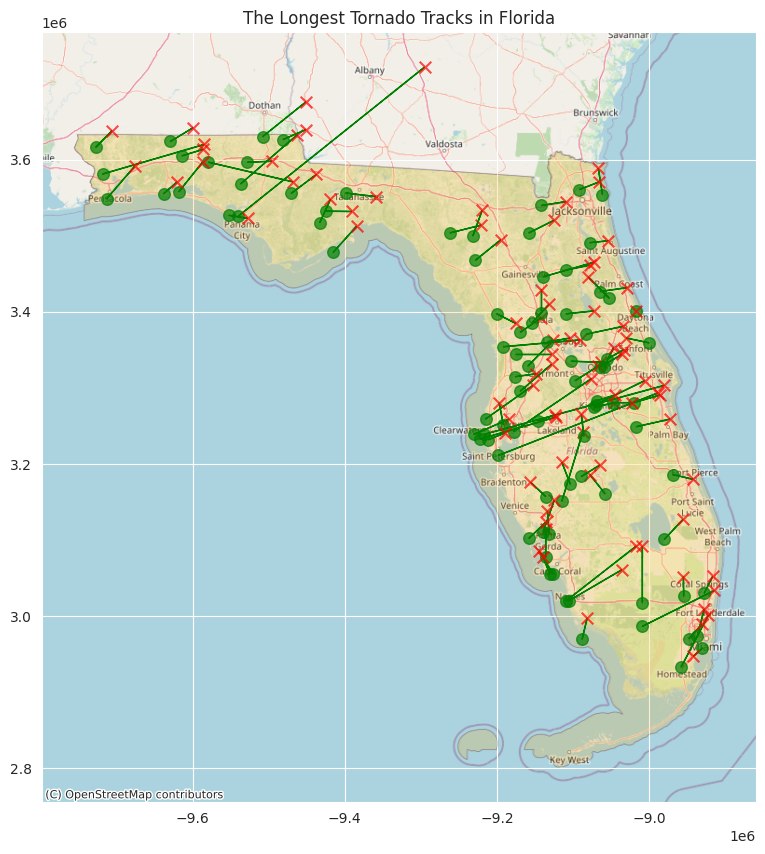

In [31]:
# Create a subset containing all tornadoes from Florida
florida_tornadoes = tornado_df[(tornado_df['state'] == 'FL')]

# Sort values based on track length
flo_longest_tracks = florida_tornadoes.sort_values(by='track_length_km', ascending=False).head(90)

# Use the earlier GeoPandas dataframe to filter for Florida
florida_df = us_49[us_49.index == 'FL']

# Reproject the map to web-mercator for compatibility with contextily
florida_df = florida_df.to_crs(epsg=3857)

# Plot Florida
fig, ax = plt.subplots(figsize=(14, 10))
florida_df.plot(ax=ax, color='orange', edgecolor="black", linewidth=0.5, alpha=0.2)

# Loop through the df to get the starting and ending lat and long values
for index, row in flo_longest_tracks.iterrows():
    start_lat = row['start_lat']
    start_long = row['start_long']
    end_lat = row['end_lat']
    end_long = row['end_long']

    # Convert these values to web-mercator for contextily
    start_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([start_long], [start_lat]), crs=4326)
    start_point = start_point.to_crs(epsg=3857)
    end_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([end_long], [end_lat]), crs=4326)
    end_point = end_point.to_crs(epsg=3857)

    # Plot the starting point as a green dot
    ax.scatter(start_point.geometry.x, start_point.geometry.y, color='green', marker='o', s=70, alpha=0.7)

    # Plot the approximate trajectory and endpoint as an arrow
    ax.add_patch(plt.Arrow(start_point.geometry.x.iloc[0], start_point.geometry.y.iloc[0],
                           end_point.geometry.x.iloc[0] - start_point.geometry.x.iloc[0],
                           end_point.geometry.y.iloc[0] - start_point.geometry.y.iloc[0],
                           color='green', width=1000))

    # Plot the endpoint as a red 'x'
    ax.scatter(end_point.geometry.x, end_point.geometry.y, color='red', marker='x', s=70, alpha=0.7)

# Add basemap with using OpenStreetMap
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=7)

plt.title('The Longest Tornado Tracks in Florida')
plt.show()

The northeastern parts of Florida (not part of the peninsula) kept the above tendency; however, tornado directions in the central parts are closer to W-E, while the tornadoes that form in the south have more pronounced S-N trajectories. The SW-NE movement tendency is known to be caused by an [active synoptic-scale low-pressure system](https://www.britannica.com/science/tornado/Funnel-clouds#ref218376) covering roughly half of North America, and thus, around 80% of tornadoes move in the above seen directions.

### 8. State Comparison
In this section, we will examine whether certain regions in the above three states are more prone to having a higher number of tornadoes. In this case, we will only look at the last decade.

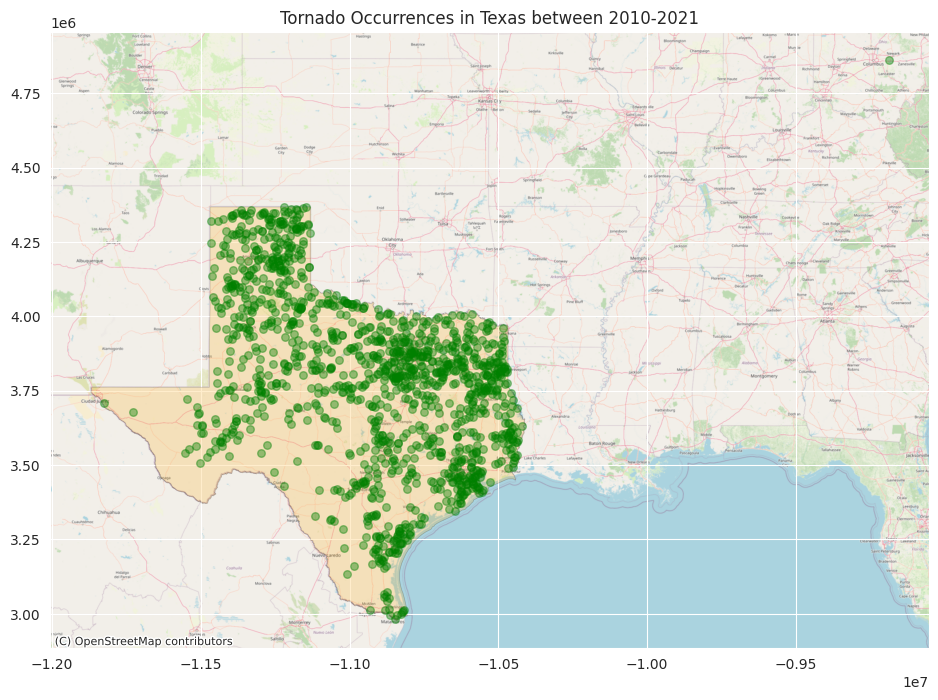

In [32]:
# Get the tornadoes between 2010-2021
tex_tornadoes_2010_2021 = texas_tornadoes[(texas_tornadoes['year'] >= 2010) & (texas_tornadoes['year'] <= 2021)]

# Plot Texas using the earlier df
fig, ax = plt.subplots(figsize=(12, 8))
texas_df.plot(ax=ax, color='orange', edgecolor="black", linewidth=0.5, alpha=0.2)

# Loop through the df to get the starting and ending lat and long values
for index, row in tex_tornadoes_2010_2021.iterrows():
    start_lat = row['start_lat']
    start_long = row['start_long']

    # Convert these values to web-mercator for contextily
    start_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([start_long], [start_lat]), crs=4326)
    start_point = start_point.to_crs(epsg=3857)

    # Plot the starting point as a green dot
    plt.scatter(start_point.geometry.x,
                start_point.geometry.y,
                c='green',
                marker='o',
                s=30,
                alpha=0.4) # Decrease the alpha so that we can see darker areas created by densely arranged dots

# Add basemap with using OpenStreetMap
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=7) # The map in this case appears zoomed out which is caused by the high number of dots

plt.title('Tornado Occurrences in Texas between 2010-2021')
plt.show()

In the case of Texas, our map suggests that the southeastern parts of the state are realtively safe. However, we can notice that in the north, west, and seaside parts, there are several tornado hotspots. Let's see if the same is true for Kansas and Florida.

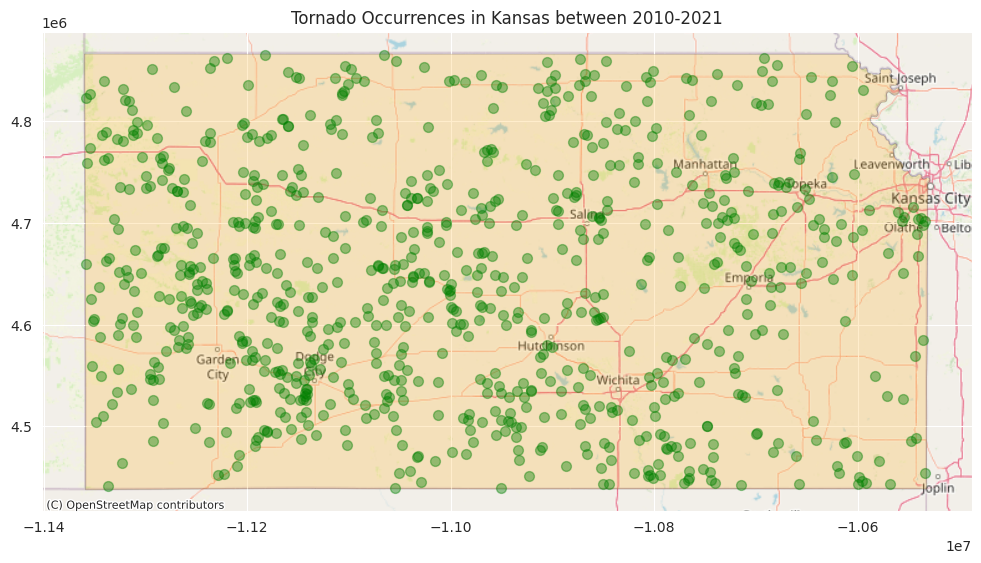

In [33]:
# Get the tornadoes between 2010-2021
kan_tornadoes_2010_2021 = kansas_tornadoes[(kansas_tornadoes['year'] >= 2010) & (kansas_tornadoes['year'] <= 2021)]

# Plot Kansas using the earlier df
fig, ax = plt.subplots(figsize=(12, 8))
kansas_df.plot(ax=ax, color='orange', edgecolor="black", linewidth=0.5, alpha=0.2)

# Loop through the df to get the starting and ending lat and long values
for index, row in kan_tornadoes_2010_2021.iterrows():
    start_lat = row['start_lat']
    start_long = row['start_long']

    # Convert these values to web-mercator for contextily
    start_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([start_long], [start_lat]), crs=4326)
    start_point = start_point.to_crs(epsg=3857)

    # Plot the starting point as a green dot
    plt.scatter(start_point.geometry.x,
                start_point.geometry.y,
                c='green',
                marker='o',
                s=50,
                alpha=0.4) # Decrease the alpha so that we can see darker areas created by densely arranged dots

# Add basemap with using OpenStreetMap
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=7)

plt.title('Tornado Occurrences in Kansas between 2010-2021')
plt.show()

Contrary to Texas, the tornado map of Kansas looks quite random. If we had to point out one hotspot, it might be the Dodge City area, while the region south of Kansas City seems quieter.

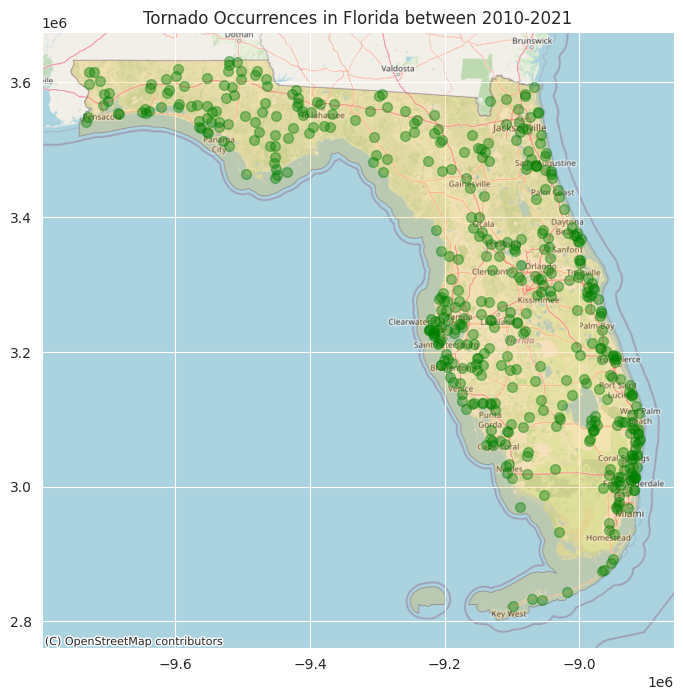

In [34]:
# Get the tornadoes between 2010-2021
flo_tornadoes_2010_2021 = florida_tornadoes[(florida_tornadoes['year'] >= 2010) & (florida_tornadoes['year'] <= 2021)]

# Plot Florida using the earlier df
fig, ax = plt.subplots(figsize=(12, 8))
florida_df.plot(ax=ax, color='orange', edgecolor="black", linewidth=0.5, alpha=0.2)

# Loop through the df to get the starting and ending lat and long values
for index, row in flo_tornadoes_2010_2021.iterrows():
    start_lat = row['start_lat']
    start_long = row['start_long']

    # Convert these values to web-mercator for contextily
    start_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([start_long], [start_lat]), crs=4326)
    start_point = start_point.to_crs(epsg=3857)

    # Plot the starting point as a green dot
    plt.scatter(start_point.geometry.x,
                start_point.geometry.y,
                c='green',
                marker='o',
                s=50,
                alpha=0.4) # Decrease the alpha so that we can see darker areas created by densely arranged dots

# Add basemap with using OpenStreetMap
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=7)

plt.title('Tornado Occurrences in Florida between 2010-2021')
plt.show()

It looks like Florida's eastern coast and the central part of the western coast are the areas most prone to tornadoes. West of Miami and west of Gaineswille seem relatively quiet areas.

### 9. Time-Based Impact Analysis
Below, we will examine the changing rate of injuries and fatalities over time, and see if there is a difference between the second half of the 20th century and the first two decades of the 21st.

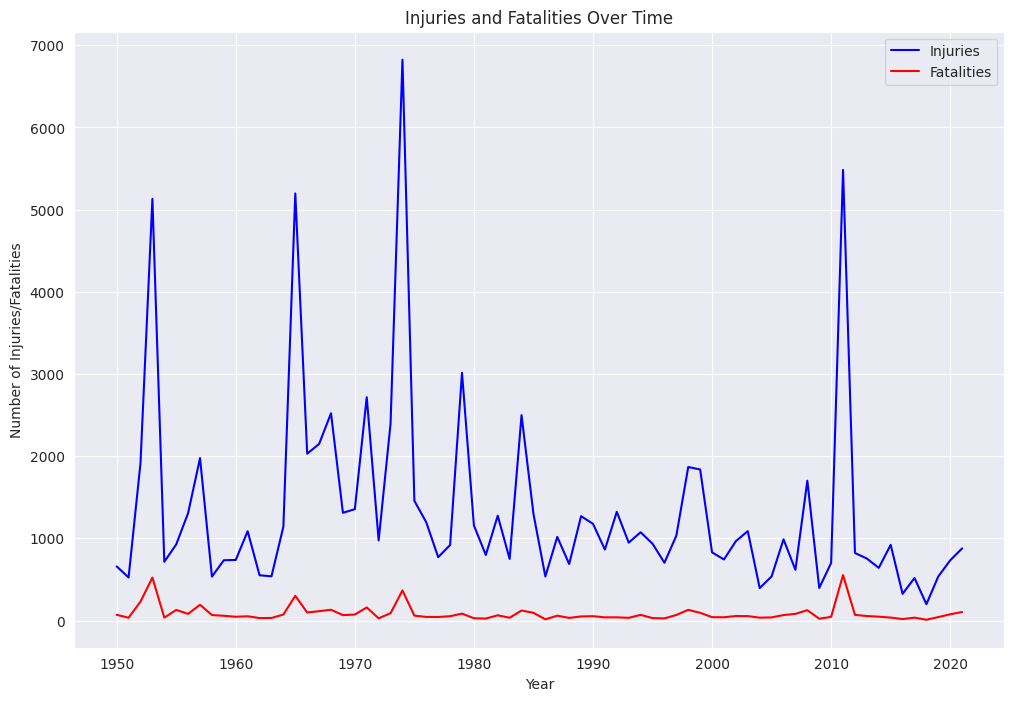

In [35]:
# Count the number of injuries and fatalities for each year
injuries_df = tornado_df.groupby('year')['injuries'].sum()
fatalities_df = tornado_df.groupby('year')['fatalities'].sum()

# Plot the data on a single line chart
plt.figure(figsize=(12, 8))
plt.plot(injuries_df.index, injuries_df.values, label='Injuries', color='blue')
plt.plot(fatalities_df.index, fatalities_df.values, label='Fatalities', color='red')
plt.title('Injuries and Fatalities Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Injuries/Fatalities')
plt.legend()


plt.show()

The chart above shows us that in the second half of the 20th century, the rate of injuries was slightly higher and there were more peaks. In the 21st century, the rate has decreased slightly, with one significant peak in 2011. The presence of peaks in fatalities is similar to what the tendency of injuries shows us over time. This decreasing tendency can be better visualized if we use a rolling average in our plot.

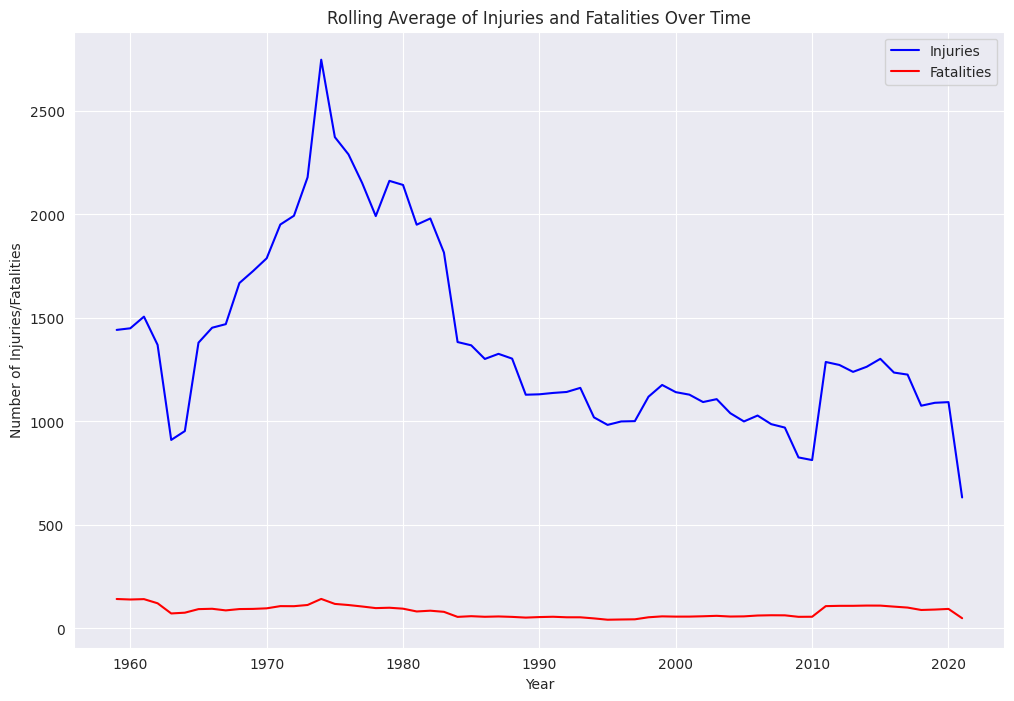

In [36]:
# Smoothen the lines using rolling average
injuries_df = injuries_df.rolling(window=10).mean()
fatalities_df = fatalities_df.rolling(window=10).mean()

# Plot the data on a single line chart
plt.figure(figsize=(12, 8))
plt.plot(injuries_df.index, injuries_df.values, label='Injuries', color='blue')
plt.plot(fatalities_df.index, fatalities_df.values, label='Fatalities', color='red')
plt.title('Rolling Average of Injuries and Fatalities Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Injuries/Fatalities')
plt.legend()

plt.show()

# Conclusion
As we have seen above, although the number of tornadoes appear to be increasing each year, the number of injuries and fatalities shows a decreasing tendency, which is likely due to the development of better early warning systems and response teams. At the same time, despite their high numbers, tornadoes above category 3 remain remain relatively rare, and their numbers are decreasing according to our data. To read more about the changes in tornado occurrences affecting various regions of the US, see [Gensini - Brooks 2018](https://www.nature.com/articles/s41612-018-0048-2.pdf).